In [ ]:
# importing libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importing the CITES wildlife dataset

In [ ]:
df = pd.read_csv("CITES_wildlife_trade.csv")

In [ ]:
df.head()

,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C
1,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,XV,RS,RS,NaN,1.0,bodies,NaN,Q,O
2,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,feathers,NaN,S,W
3,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,BE,NO,NaN,NaN,43.0,specimens,NaN,S,W
4,2016,I,Haliaeetus albicilla,Aves,Falconiformes,Accipitridae,Haliaeetus,DK,IS,NaN,700.0,NaN,specimens,NaN,S,W


In [ ]:
print (f"CITES dataset has {df.shape[0]} rows and {df.shape[1]} columns")

CITES dataset has 67161 rows and 16 columns


Checking the dataset

In [ ]:
df.describe()

,Year,Importer reported quantity,Exporter reported quantity
count,67161.000000,3.186600e+04,4.402100e+04
mean,2016.002293,4.382425e+03,4.443878e+03
std,0.047831,1.449103e+05,1.573794e+05
min,2016.000000,0.000000e+00,2.000000e-06
25%,2016.000000,3.000000e+00,2.000000e+00
50%,2016.000000,1.200000e+01,1.200000e+01
75%,2016.000000,8.000000e+01,8.200000e+01
max,2017.000000,1.952498e+07,2.154362e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67161 entries, 0 to 67160
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        67161 non-null  int64  
 1   App.                        67161 non-null  object 
 2   Taxon                       67161 non-null  object 
 3   Class                       46937 non-null  object 
 4   Order                       67104 non-null  object 
 5   Family                      66700 non-null  object 
 6   Genus                       65702 non-null  object 
 7   Importer                    67090 non-null  object 
 8   Exporter                    66588 non-null  object 
 9   Origin                      25643 non-null  object 
 10  Importer reported quantity  31866 non-null  float64
 11  Exporter reported quantity  44021 non-null  float64
 12  Term                        67161 non-null  object 
 13  Unit                        640

In [ ]:
# checking for missing values
df.isnull().sum()

Year                              0
App.                              0
Taxon                             0
Class                         20224
Order                            57
Family                          461
Genus                          1459
Importer                         71
Exporter                        573
Origin                        41518
Importer reported quantity    35295
Exporter reported quantity    23140
Term                              0
Unit                          60759
Purpose                        6059
Source                          544
dtype: int64

In [ ]:
df.select_dtypes(include=['int', 'float'])

,Year,Importer reported quantity,Exporter reported quantity
0,2016,NaN,1.0
1,2016,NaN,1.0
2,2016,NaN,43.0
3,2016,NaN,43.0
4,2016,700.0,NaN
...,...,...,...
67156,2017,NaN,7.0
67157,2017,NaN,2.0
67158,2017,200.0,NaN
67159,2017,NaN,635.1


In [ ]:
df["App."].unique()

array(['I', 'II', 'III', 'N'], dtype=object)

In [ ]:
# use groupby to count the sum of each unique values in the App column
df.groupby("App.")["App."].count()

App.
I       5976
II     59253
III     1739
N        193
Name: App., dtype: int64

In [ ]:
df2 = df.copy()

In [ ]:
# changing the Year data type
df2['Year'] = df2['Year'].astype("category")

In [ ]:
df2.drop(['Class', 'Origin','Unit'], axis=1, inplace=True)

In [ ]:
df2.head().T

,0,1,2,3,4
Year,2016,2016,2016,2016,2016
App.,I,I,I,I,I
Taxon,Aquila heliaca,Aquila heliaca,Haliaeetus albicilla,Haliaeetus albicilla,Haliaeetus albicilla
Order,Falconiformes,Falconiformes,Falconiformes,Falconiformes,Falconiformes
Family,Accipitridae,Accipitridae,Accipitridae,Accipitridae,Accipitridae
Genus,Aquila,Aquila,Haliaeetus,Haliaeetus,Haliaeetus
Importer,TR,XV,BE,BE,DK
Exporter,NL,RS,NO,NO,IS
Importer reported quantity,NaN,NaN,NaN,NaN,700.0
Exporter reported quantity,1.0,1.0,43.0,43.0,NaN


Filling the missing values

In [ ]:
df2[['Exporter reported quantity', 'Importer reported quantity']] = df2[['Exporter reported quantity', 'Importer reported quantity']].fillna(0)


In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
df2[['Order','Family', 'Genus', 'Importer', 'Exporter', 'Purpose', 'Source']] = imp.fit_transform(df2[['Order','Family', 'Genus', 'Importer', 'Exporter', 'Purpose', 'Source']])

In [ ]:
df2.isnull().sum()

Year                          0
App.                          0
Taxon                         0
Order                         0
Family                        0
Genus                         0
Importer                      0
Exporter                      0
Importer reported quantity    0
Exporter reported quantity    0
Term                          0
Purpose                       0
Source                        0
dtype: int64

In [ ]:
df2.head()

,Year,App.,Taxon,Order,Family,Genus,Importer,Exporter,Importer reported quantity,Exporter reported quantity,Term,Purpose,Source
0,2016,I,Aquila heliaca,Falconiformes,Accipitridae,Aquila,TR,NL,0.0,1.0,bodies,T,C
1,2016,I,Aquila heliaca,Falconiformes,Accipitridae,Aquila,XV,RS,0.0,1.0,bodies,Q,O
2,2016,I,Haliaeetus albicilla,Falconiformes,Accipitridae,Haliaeetus,BE,NO,0.0,43.0,feathers,S,W
3,2016,I,Haliaeetus albicilla,Falconiformes,Accipitridae,Haliaeetus,BE,NO,0.0,43.0,specimens,S,W
4,2016,I,Haliaeetus albicilla,Falconiformes,Accipitridae,Haliaeetus,DK,IS,700.0,0.0,specimens,S,W


In [ ]:
data = df2[['Year','App.','Importer','Exporter','Importer reported quantity','Exporter reported quantity','Purpose']]

<Axes: title={'center': 'CITES Appendix'}>

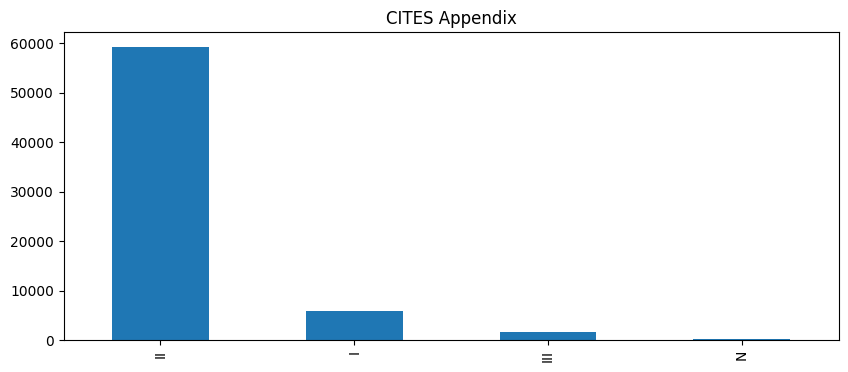

In [ ]:
fig_char = {'figsize': (10, 4), 'fontsize': 10}
data['App.'].value_counts().plot.bar(**fig_char,
                                      title="CITES Appendix")

<Axes: title={'center': 'Top 10 Importing/Exporting Countries'}>

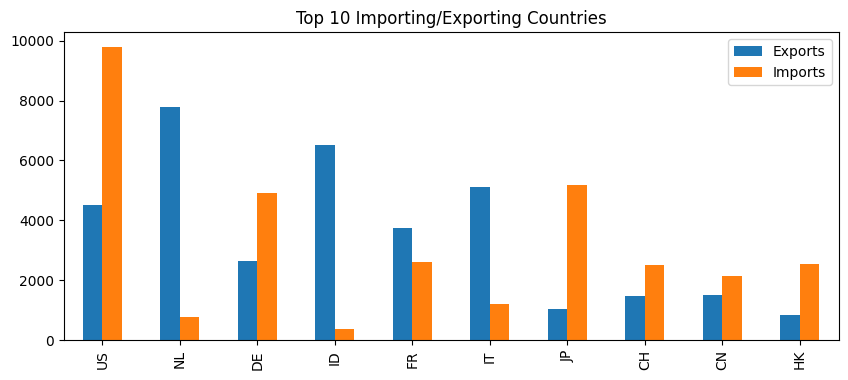

In [ ]:
(pd.DataFrame()
     .assign(Exports=data.Exporter.value_counts(),
             Imports=data.Importer.value_counts())
     .pipe(lambda df: df.loc[df.fillna(0).sum(axis='columns').sort_values(ascending=False).index])
     .head(10)
     .plot.bar(**fig_char, title="Top 10 Importing/Exporting Countries")
)

From the above visualization United state of America is the largest importer while Netherlands is the largest exporter.


<Axes: title={'center': 'Import/Export Purposes'}>

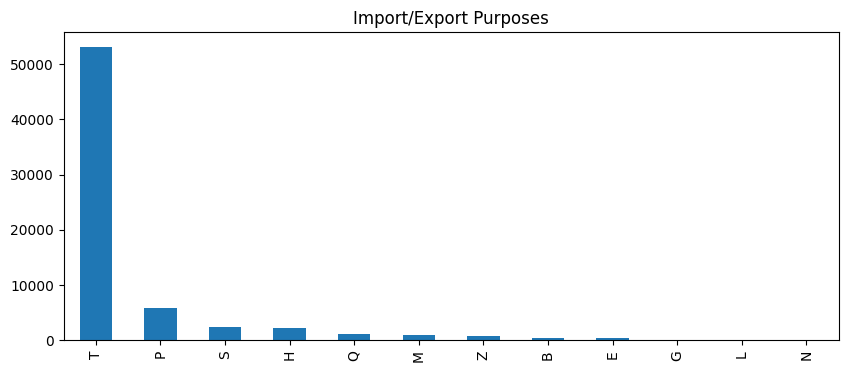

In [ ]:
data['Purpose'].value_counts().plot.bar(**fig_char, title="Import/Export Purposes")

The major purpose of importation and exportation is for commercial purpose and personal reason is next
